## The Spark Foundation 
### Task 1: Predicting the percentage of marks/scores of an student based on number of study hours using simple linear regression Python Scikit Learn

### Author: Kamini Bhushan Wable 

In [1]:
# Importing all libraries required in this notebook
import pandas as pd     
import numpy as np    # FOR ARITHMETIC OPERATIONS 
import matplotlib.pyplot as plt  # FOR IMPORTING PLOT/GRAPH FUNTIONS 
%matplotlib inline

In [8]:
std_data = pd.read_csv("http://bit.ly/w-data")  #READING STUDENTS DATA FROM DATASET 
print("Data imported successfully....!")
std_data.head(10)     #CONSIDERING ONLY 1ST 10 INPUT FOR OUR CONVENIENCE 


Data imported successfully....!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Data description 

In [18]:
std_data.describe() #It gives us the basic information about our data, like its mean, median, std, minimum and maximum counts


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Visualizing given data using plot  

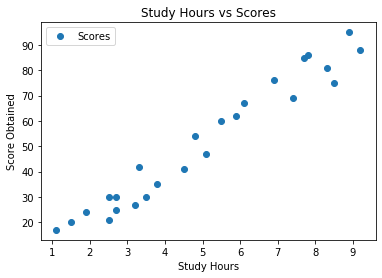

In [16]:
# Plotting the distribution of scores
std_data.plot(x='Hours', y='Scores' , style='o')
plt.title('Study Hours vs Scores')
plt.xlabel('Study Hours')
plt.ylabel('Score Obtained')
plt.show()

#### Above graph indicates that, there is positive linear relation between Study Hours and Score obtained by Students 

### Preparing Data

In [19]:
#Dividing the data into "attributes" (inputs=x) and "labels" (outputs=y).

In [24]:
x = std_data.iloc[:, :-1].values  
y = std_data.iloc[:, 1].values

##### Now as we have our data as in input and output form lets split it in training and test set using Scikit-Learn's built-in train_test_split() method

In [25]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

## Training 

In [26]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


##### Plotting the regression line 

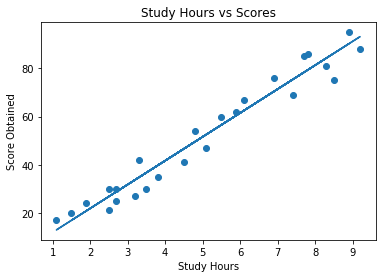

In [28]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)    #Plotting scatter plot 
plt.xlabel('Study Hours')
plt.ylabel('Score Obtained')
plt.title('Study Hours vs Scores')
#Plotting for the test data 
plt.plot(x, line)
plt.show()

### It's time to make some prediction using available data

In [29]:
print(x_test)   #Testing data - In Hours
y_pred = regressor.predict(x_test)   #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [30]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Prediction of score when student studies for 9.25 hours.

In [32]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### So, here we can say that student can score up to 93.6917% when he/she studies for 9.25 hrs a day 

#### Evaluating performance of Algorithm 

In [35]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
